In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

import math
from tqdm import tqdm

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

x_train, y_train = mnist.train.images, mnist.train.labels

test_img_counts = mnist.test.images.shape[0]
num_real_test = 10
half_test = (test_img_counts - num_real_test) / 2
x_valid, y_valid = mnist.test.images[:half_test], mnist.test.labels[:half_test] 
x_test, y_test = mnist.test.images[half_test:], mnist.test.labels[half_test:]

# 那10个出来用于最终测试
real_x_test, real_y_test = mnist.test.images[test_img_counts-10:], mnist.test.images[test_img_counts-10:]


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


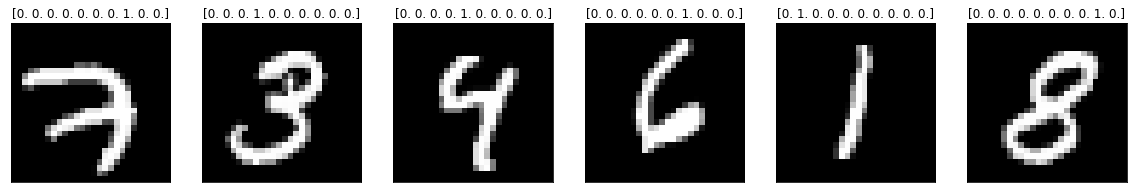

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(np.reshape(x_train[i:i+1], (28, 28)), cmap='gray')
    ax.set_title(str(y_train[i]))


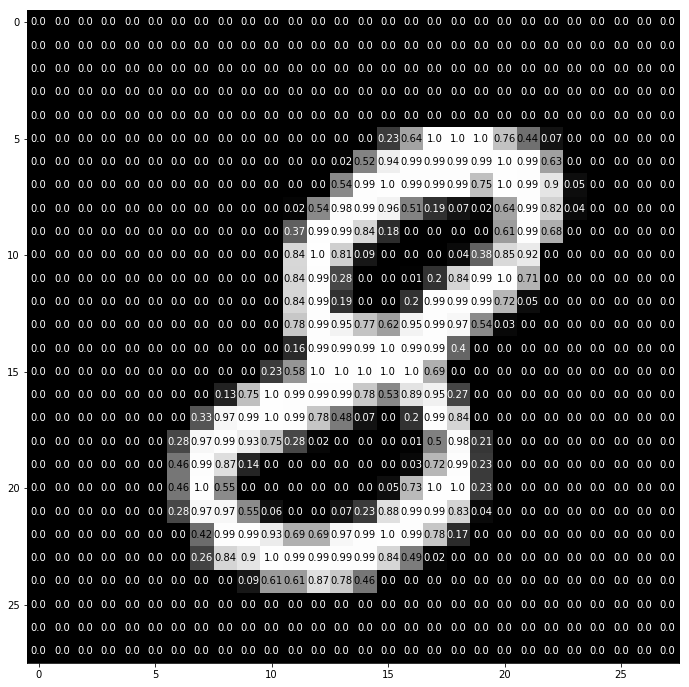

In [19]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(np.reshape(x_train[5:6], (28, 28)), ax)

In [22]:

img_size = 28 * 28
num_classes = 10
learning_rate = 0.1
epochs = 60
batch_size = 128

# create model
x = tf.placeholder(tf.float32, [None, img_size])
W = tf.Variable(tf.zeros([img_size, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))
y = tf.nn.softmax(tf.matmul(x, W) + b)

# define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

valid_feed_dict = { x: x_valid, y_: y_valid  }
test_feed_dict = { x: x_test, y_: y_test }

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
iteration = 0
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
        
    batch_count = int(math.ceil(mnist.train.labels.shape[0] / 128.0))
    for e in range(epochs):
        
        for batch_i in range(batch_count):
            batch_start = batch_i * batch_size
            batch_x = mnist.train.images[batch_start:batch_start+batch_size]
            batch_y = mnist.train.labels[batch_start:batch_start+batch_size]
            loss, _ = sess.run([cost, optimizer], feed_dict={x: batch_x, y_: batch_y})
            
            if batch_i % 20 == 0:
                print("Epoch: {}/{}".format(e+1, epochs), 
                      "Iteration: {}".format(iteration), 
                      "Training loss: {:.5f}".format(loss))
            iteration += 1

            if iteration % batch_size == 0:
                valid_acc = sess.run(accuracy, feed_dict=valid_feed_dict)
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Validation Accuracy: {:.5f}".format(valid_acc))
    
    saver.save(sess, "checkpoints/mnist_mlp_tf.ckpt")


('Epoch: 1/60', 'Iteration: 0', 'Training loss: 2.30259')
('Epoch: 1/60', 'Iteration: 20', 'Training loss: 2.27273')
('Epoch: 1/60', 'Iteration: 40', 'Training loss: 2.19583')
('Epoch: 1/60', 'Iteration: 60', 'Training loss: 2.15586')
('Epoch: 1/60', 'Iteration: 80', 'Training loss: 2.07523')
('Epoch: 1/60', 'Iteration: 100', 'Training loss: 2.08399')
('Epoch: 1/60', 'Iteration: 120', 'Training loss: 1.94980')
('Epoch: 0/60', 'Iteration: 128', 'Validation Accuracy: 0.60641')
('Epoch: 1/60', 'Iteration: 140', 'Training loss: 1.91662')
('Epoch: 1/60', 'Iteration: 160', 'Training loss: 1.90578')
('Epoch: 1/60', 'Iteration: 180', 'Training loss: 1.85831')
('Epoch: 1/60', 'Iteration: 200', 'Training loss: 1.93051')
('Epoch: 1/60', 'Iteration: 220', 'Training loss: 1.85612')
('Epoch: 1/60', 'Iteration: 240', 'Training loss: 1.84803')
('Epoch: 0/60', 'Iteration: 256', 'Validation Accuracy: 0.75656')
('Epoch: 1/60', 'Iteration: 260', 'Training loss: 1.85057')
('Epoch: 1/60', 'Iteration: 280', 

('Epoch: 6/60', 'Iteration: 2370', 'Training loss: 1.62591')
('Epoch: 6/60', 'Iteration: 2390', 'Training loss: 1.59461')
('Epoch: 6/60', 'Iteration: 2410', 'Training loss: 1.66073')
('Epoch: 6/60', 'Iteration: 2430', 'Training loss: 1.58061')
('Epoch: 5/60', 'Iteration: 2432', 'Validation Accuracy: 0.86446')
('Epoch: 6/60', 'Iteration: 2450', 'Training loss: 1.58046')
('Epoch: 6/60', 'Iteration: 2470', 'Training loss: 1.66491')
('Epoch: 6/60', 'Iteration: 2490', 'Training loss: 1.61312')
('Epoch: 6/60', 'Iteration: 2510', 'Training loss: 1.61967')
('Epoch: 6/60', 'Iteration: 2530', 'Training loss: 1.60697')
('Epoch: 6/60', 'Iteration: 2550', 'Training loss: 1.64170')
('Epoch: 5/60', 'Iteration: 2560', 'Validation Accuracy: 0.86707')
('Epoch: 6/60', 'Iteration: 2570', 'Training loss: 1.57789')
('Epoch: 7/60', 'Iteration: 2580', 'Training loss: 1.62359')
('Epoch: 7/60', 'Iteration: 2600', 'Training loss: 1.61000')
('Epoch: 7/60', 'Iteration: 2620', 'Training loss: 1.61644')
('Epoch: 7/6

('Epoch: 11/60', 'Iteration: 4720', 'Training loss: 1.56007')
('Epoch: 12/60', 'Iteration: 4730', 'Training loss: 1.59702')
('Epoch: 11/60', 'Iteration: 4736', 'Validation Accuracy: 0.87908')
('Epoch: 12/60', 'Iteration: 4750', 'Training loss: 1.58039')
('Epoch: 12/60', 'Iteration: 4770', 'Training loss: 1.60141')
('Epoch: 12/60', 'Iteration: 4790', 'Training loss: 1.59194')
('Epoch: 12/60', 'Iteration: 4810', 'Training loss: 1.57697')
('Epoch: 12/60', 'Iteration: 4830', 'Training loss: 1.61479')
('Epoch: 12/60', 'Iteration: 4850', 'Training loss: 1.54173')
('Epoch: 11/60', 'Iteration: 4864', 'Validation Accuracy: 0.87868')
('Epoch: 12/60', 'Iteration: 4870', 'Training loss: 1.54934')
('Epoch: 12/60', 'Iteration: 4890', 'Training loss: 1.56577')
('Epoch: 12/60', 'Iteration: 4910', 'Training loss: 1.55861')
('Epoch: 12/60', 'Iteration: 4930', 'Training loss: 1.62895')
('Epoch: 12/60', 'Iteration: 4950', 'Training loss: 1.58294')
('Epoch: 12/60', 'Iteration: 4970', 'Training loss: 1.5499

('Epoch: 16/60', 'Iteration: 7040', 'Validation Accuracy: 0.88468')
('Epoch: 17/60', 'Iteration: 7040', 'Training loss: 1.55858')
('Epoch: 17/60', 'Iteration: 7060', 'Training loss: 1.55257')
('Epoch: 17/60', 'Iteration: 7080', 'Training loss: 1.61823')
('Epoch: 17/60', 'Iteration: 7100', 'Training loss: 1.57128')
('Epoch: 17/60', 'Iteration: 7120', 'Training loss: 1.53678')
('Epoch: 17/60', 'Iteration: 7140', 'Training loss: 1.61731')
('Epoch: 17/60', 'Iteration: 7160', 'Training loss: 1.53409')
('Epoch: 16/60', 'Iteration: 7168', 'Validation Accuracy: 0.88448')
('Epoch: 17/60', 'Iteration: 7180', 'Training loss: 1.53895')
('Epoch: 17/60', 'Iteration: 7200', 'Training loss: 1.61630')
('Epoch: 17/60', 'Iteration: 7220', 'Training loss: 1.57645')
('Epoch: 17/60', 'Iteration: 7240', 'Training loss: 1.57348')
('Epoch: 17/60', 'Iteration: 7260', 'Training loss: 1.57495')
('Epoch: 17/60', 'Iteration: 7280', 'Training loss: 1.60599')
('Epoch: 16/60', 'Iteration: 7296', 'Validation Accuracy: 

('Epoch: 21/60', 'Iteration: 9344', 'Validation Accuracy: 0.88829')
('Epoch: 22/60', 'Iteration: 9350', 'Training loss: 1.60835')
('Epoch: 22/60', 'Iteration: 9370', 'Training loss: 1.57135')
('Epoch: 22/60', 'Iteration: 9390', 'Training loss: 1.56637')
('Epoch: 22/60', 'Iteration: 9410', 'Training loss: 1.57227')
('Epoch: 22/60', 'Iteration: 9430', 'Training loss: 1.60126')
('Epoch: 22/60', 'Iteration: 9450', 'Training loss: 1.55049')
('Epoch: 23/60', 'Iteration: 9460', 'Training loss: 1.57285')
('Epoch: 22/60', 'Iteration: 9472', 'Validation Accuracy: 0.88869')
('Epoch: 23/60', 'Iteration: 9480', 'Training loss: 1.56168')
('Epoch: 23/60', 'Iteration: 9500', 'Training loss: 1.59109')
('Epoch: 23/60', 'Iteration: 9520', 'Training loss: 1.57537')
('Epoch: 23/60', 'Iteration: 9540', 'Training loss: 1.56370')
('Epoch: 23/60', 'Iteration: 9560', 'Training loss: 1.59687')
('Epoch: 23/60', 'Iteration: 9580', 'Training loss: 1.52786')
('Epoch: 22/60', 'Iteration: 9600', 'Validation Accuracy: 

('Epoch: 27/60', 'Iteration: 11560', 'Training loss: 1.57058')
('Epoch: 27/60', 'Iteration: 11580', 'Training loss: 1.59803')
('Epoch: 27/60', 'Iteration: 11600', 'Training loss: 1.54819')
('Epoch: 28/60', 'Iteration: 11610', 'Training loss: 1.56601')
('Epoch: 28/60', 'Iteration: 11630', 'Training loss: 1.55742')
('Epoch: 27/60', 'Iteration: 11648', 'Validation Accuracy: 0.89069')
('Epoch: 28/60', 'Iteration: 11650', 'Training loss: 1.58865')
('Epoch: 28/60', 'Iteration: 11670', 'Training loss: 1.57151')
('Epoch: 28/60', 'Iteration: 11690', 'Training loss: 1.56036')
('Epoch: 28/60', 'Iteration: 11710', 'Training loss: 1.59268')
('Epoch: 28/60', 'Iteration: 11730', 'Training loss: 1.52493')
('Epoch: 28/60', 'Iteration: 11750', 'Training loss: 1.52723')
('Epoch: 28/60', 'Iteration: 11770', 'Training loss: 1.55031')
('Epoch: 27/60', 'Iteration: 11776', 'Validation Accuracy: 0.89249')
('Epoch: 28/60', 'Iteration: 11790', 'Training loss: 1.54628')
('Epoch: 28/60', 'Iteration: 11810', 'Train

('Epoch: 33/60', 'Iteration: 13780', 'Training loss: 1.55421')
('Epoch: 33/60', 'Iteration: 13800', 'Training loss: 1.58684')
('Epoch: 33/60', 'Iteration: 13820', 'Training loss: 1.56851')
('Epoch: 32/60', 'Iteration: 13824', 'Validation Accuracy: 0.89469')
('Epoch: 33/60', 'Iteration: 13840', 'Training loss: 1.55775')
('Epoch: 33/60', 'Iteration: 13860', 'Training loss: 1.58947')
('Epoch: 33/60', 'Iteration: 13880', 'Training loss: 1.52272')
('Epoch: 33/60', 'Iteration: 13900', 'Training loss: 1.52424')
('Epoch: 33/60', 'Iteration: 13920', 'Training loss: 1.54791')
('Epoch: 33/60', 'Iteration: 13940', 'Training loss: 1.54472')
('Epoch: 32/60', 'Iteration: 13952', 'Validation Accuracy: 0.89510')
('Epoch: 33/60', 'Iteration: 13960', 'Training loss: 1.60205')
('Epoch: 33/60', 'Iteration: 13980', 'Training loss: 1.55421')
('Epoch: 33/60', 'Iteration: 14000', 'Training loss: 1.51782')
('Epoch: 33/60', 'Iteration: 14020', 'Training loss: 1.60018')
('Epoch: 33/60', 'Iteration: 14040', 'Train

('Epoch: 38/60', 'Iteration: 16070', 'Training loss: 1.54596')
('Epoch: 38/60', 'Iteration: 16090', 'Training loss: 1.54355')
('Epoch: 38/60', 'Iteration: 16110', 'Training loss: 1.59900')
('Epoch: 37/60', 'Iteration: 16128', 'Validation Accuracy: 0.89670')
('Epoch: 38/60', 'Iteration: 16130', 'Training loss: 1.55136')
('Epoch: 38/60', 'Iteration: 16150', 'Training loss: 1.51447')
('Epoch: 38/60', 'Iteration: 16170', 'Training loss: 1.59699')
('Epoch: 38/60', 'Iteration: 16190', 'Training loss: 1.52244')
('Epoch: 38/60', 'Iteration: 16210', 'Training loss: 1.52119')
('Epoch: 38/60', 'Iteration: 16230', 'Training loss: 1.59444')
('Epoch: 38/60', 'Iteration: 16250', 'Training loss: 1.56153')
('Epoch: 37/60', 'Iteration: 16256', 'Validation Accuracy: 0.89730')
('Epoch: 38/60', 'Iteration: 16270', 'Training loss: 1.55449')
('Epoch: 38/60', 'Iteration: 16290', 'Training loss: 1.56816')
('Epoch: 38/60', 'Iteration: 16310', 'Training loss: 1.59333')
('Epoch: 38/60', 'Iteration: 16330', 'Train

('Epoch: 43/60', 'Iteration: 18260', 'Training loss: 1.59637')
('Epoch: 43/60', 'Iteration: 18280', 'Training loss: 1.54906')
('Epoch: 43/60', 'Iteration: 18300', 'Training loss: 1.51170')
('Epoch: 42/60', 'Iteration: 18304', 'Validation Accuracy: 0.89870')
('Epoch: 43/60', 'Iteration: 18320', 'Training loss: 1.59427')
('Epoch: 43/60', 'Iteration: 18340', 'Training loss: 1.52124')
('Epoch: 43/60', 'Iteration: 18360', 'Training loss: 1.51896')
('Epoch: 43/60', 'Iteration: 18380', 'Training loss: 1.59172')
('Epoch: 43/60', 'Iteration: 18400', 'Training loss: 1.55939')
('Epoch: 43/60', 'Iteration: 18420', 'Training loss: 1.55215')
('Epoch: 42/60', 'Iteration: 18432', 'Validation Accuracy: 0.89850')
('Epoch: 43/60', 'Iteration: 18440', 'Training loss: 1.56734')
('Epoch: 43/60', 'Iteration: 18460', 'Training loss: 1.59172')
('Epoch: 43/60', 'Iteration: 18480', 'Training loss: 1.54393')
('Epoch: 44/60', 'Iteration: 18490', 'Training loss: 1.55241')
('Epoch: 44/60', 'Iteration: 18510', 'Train

('Epoch: 48/60', 'Iteration: 20510', 'Training loss: 1.51711')
('Epoch: 48/60', 'Iteration: 20530', 'Training loss: 1.58942')
('Epoch: 48/60', 'Iteration: 20550', 'Training loss: 1.55749')
('Epoch: 48/60', 'Iteration: 20570', 'Training loss: 1.55013')
('Epoch: 48/60', 'Iteration: 20590', 'Training loss: 1.56663')
('Epoch: 47/60', 'Iteration: 20608', 'Validation Accuracy: 0.89990')
('Epoch: 48/60', 'Iteration: 20610', 'Training loss: 1.59029')
('Epoch: 48/60', 'Iteration: 20630', 'Training loss: 1.54309')
('Epoch: 49/60', 'Iteration: 20640', 'Training loss: 1.54961')
('Epoch: 49/60', 'Iteration: 20660', 'Training loss: 1.54762')
('Epoch: 49/60', 'Iteration: 20680', 'Training loss: 1.58316')
('Epoch: 49/60', 'Iteration: 20700', 'Training loss: 1.56177')
('Epoch: 49/60', 'Iteration: 20720', 'Training loss: 1.55210')
('Epoch: 48/60', 'Iteration: 20736', 'Validation Accuracy: 0.89950')
('Epoch: 49/60', 'Iteration: 20740', 'Training loss: 1.58239')
('Epoch: 49/60', 'Iteration: 20760', 'Train

('Epoch: 54/60', 'Iteration: 22830', 'Training loss: 1.58235')
('Epoch: 54/60', 'Iteration: 22850', 'Training loss: 1.56018')
('Epoch: 54/60', 'Iteration: 22870', 'Training loss: 1.55083')
('Epoch: 54/60', 'Iteration: 22890', 'Training loss: 1.58069')
('Epoch: 54/60', 'Iteration: 22910', 'Training loss: 1.51700')
('Epoch: 53/60', 'Iteration: 22912', 'Validation Accuracy: 0.90050')
('Epoch: 54/60', 'Iteration: 22930', 'Training loss: 1.51695')
('Epoch: 54/60', 'Iteration: 22950', 'Training loss: 1.54175')
('Epoch: 54/60', 'Iteration: 22970', 'Training loss: 1.54121')
('Epoch: 54/60', 'Iteration: 22990', 'Training loss: 1.59159')
('Epoch: 54/60', 'Iteration: 23010', 'Training loss: 1.54514')
('Epoch: 54/60', 'Iteration: 23030', 'Training loss: 1.50695')
('Epoch: 53/60', 'Iteration: 23040', 'Validation Accuracy: 0.90030')
('Epoch: 54/60', 'Iteration: 23050', 'Training loss: 1.58933')
('Epoch: 54/60', 'Iteration: 23070', 'Training loss: 1.51929')
('Epoch: 54/60', 'Iteration: 23090', 'Train

('Epoch: 59/60', 'Iteration: 25120', 'Training loss: 1.54072')
('Epoch: 59/60', 'Iteration: 25140', 'Training loss: 1.58974')
('Epoch: 59/60', 'Iteration: 25160', 'Training loss: 1.54368')
('Epoch: 59/60', 'Iteration: 25180', 'Training loss: 1.50523')
('Epoch: 59/60', 'Iteration: 25200', 'Training loss: 1.58742')
('Epoch: 58/60', 'Iteration: 25216', 'Validation Accuracy: 0.90170')
('Epoch: 59/60', 'Iteration: 25220', 'Training loss: 1.51861')
('Epoch: 59/60', 'Iteration: 25240', 'Training loss: 1.51401')
('Epoch: 59/60', 'Iteration: 25260', 'Training loss: 1.58541')
('Epoch: 59/60', 'Iteration: 25280', 'Training loss: 1.55389')
('Epoch: 59/60', 'Iteration: 25300', 'Training loss: 1.54645')
('Epoch: 59/60', 'Iteration: 25320', 'Training loss: 1.56530')
('Epoch: 59/60', 'Iteration: 25340', 'Training loss: 1.58751')
('Epoch: 58/60', 'Iteration: 25344', 'Validation Accuracy: 0.90250')
('Epoch: 59/60', 'Iteration: 25360', 'Training loss: 1.54159')
('Epoch: 60/60', 'Iteration: 25370', 'Train

In [23]:
saver = tf.train.Saver()
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    test_acc = sess.run(accuracy, feed_dict=test_feed_dict)
    print("test accuracy: {:.5f}".format(test_acc))

INFO:tensorflow:Restoring parameters from checkpoints/mnist_mlp_tf.ckpt
test accuracy: 0.94406
